## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import linregress
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Output File (CSV)
filepath = "City.csv"
df = pd.read_csv(filepath)

df.head()

,City,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
0,Vaini,-21.20,-175.20,78.80,82.33,83,1015,10.29,20
1,Lakes Entrance,-37.88,147.98,67.96,63.32,47,1015,7.00,0
2,Bethel,41.37,-73.41,28.18,15.91,68,1006,12.75,90
3,Kapaa,22.08,-159.32,75.29,74.03,74,1018,12.75,40
4,Ushuaia,-54.80,-68.30,44.60,38.39,93,1006,8.05,75


In [6]:
df.shape

(577, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         577 non-null    object 
 1   Latitude     577 non-null    float64
 2   Longitude    577 non-null    float64
 3   Temperature  577 non-null    float64
 4   Feels Like   577 non-null    float64
 5   Humidity     577 non-null    int64  
 6   Pressure     577 non-null    int64  
 7   Wind Speed   577 non-null    float64
 8   Cloudiness   577 non-null    int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 40.7+ KB


In [8]:
df.describe()

,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000
mean,19.675095,19.224437,52.958198,49.217175,72.339688,1014.476603,7.518821,52.256499
std,33.488385,91.820030,27.977308,32.921015,20.708435,9.237786,5.145704,41.440638
min,-54.800000,-179.170000,-31.320000,-43.650000,1.000000,946.000000,0.110000,0.000000
25%,-7.950000,-63.860000,31.510000,23.110000,63.000000,1010.000000,3.600000,1.000000
50%,23.310000,25.100000,60.080000,55.690000,77.000000,1014.000000,6.350000,62.000000
75%,46.250000,99.830000,77.000000,78.780000,87.000000,1019.000000,10.380000,95.000000
max,78.220000,179.320000,95.000000,99.500000,100.000000,1063.000000,35.790000,100.000000


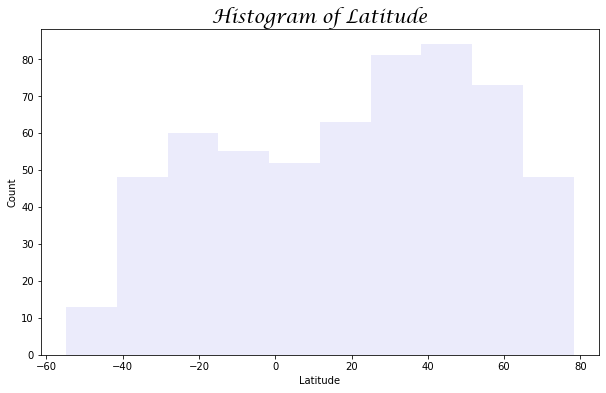

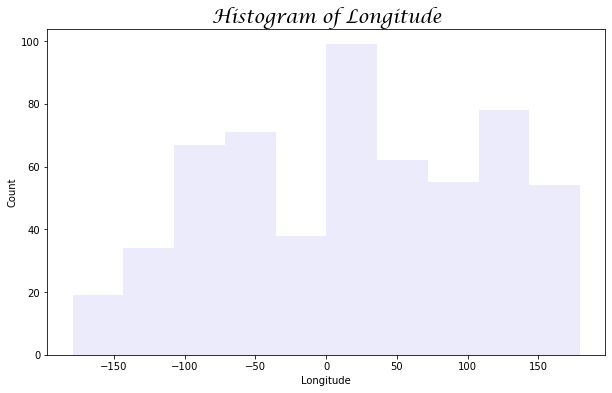

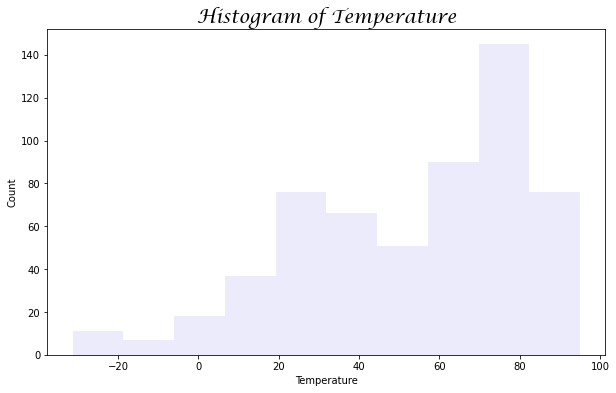

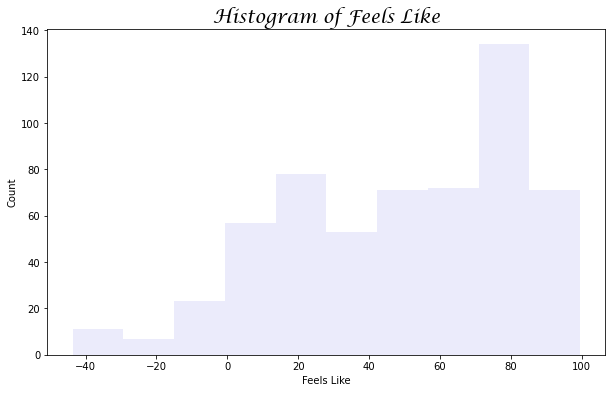

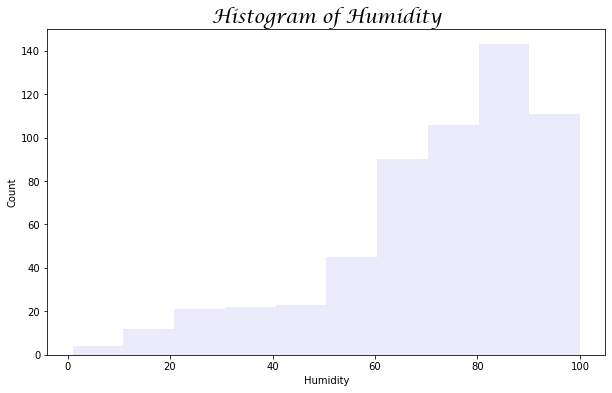

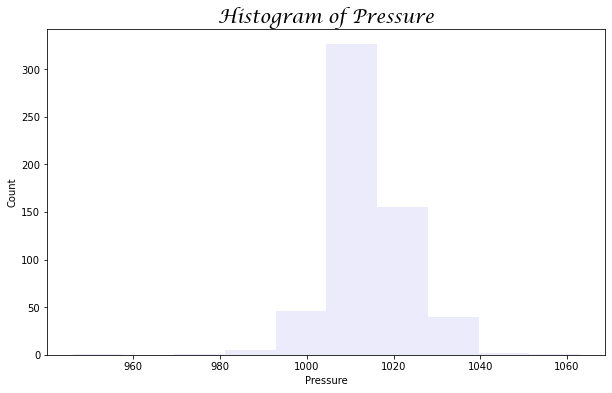

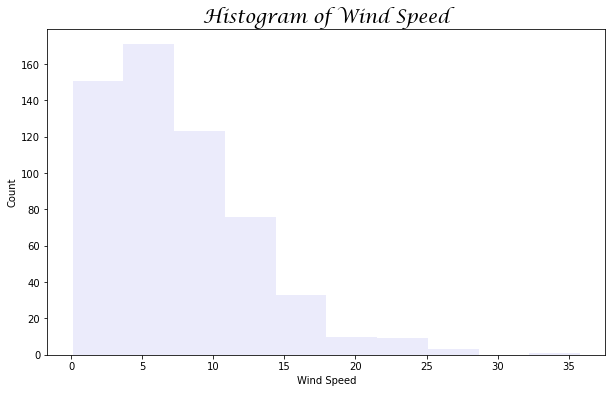

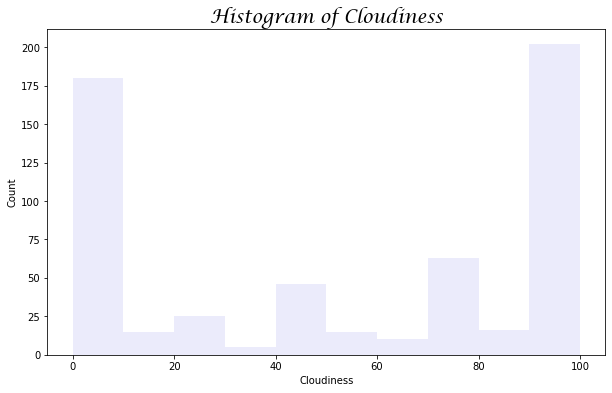

In [9]:
for col in df.columns:
        if(df[col].dtype == np.float64 or df[col].dtype == np.int64):
            
            plt.figure(figsize=(10,6))
            
            plt.hist(df[col], color = "lavender", alpha=0.8)
            plt.title(f"Histogram of {col}", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
            plt.xlabel(col)
            plt.ylabel("Count")
            
            plt.show()

In [10]:
#  Get the indices of cities that have humidity over 100%.


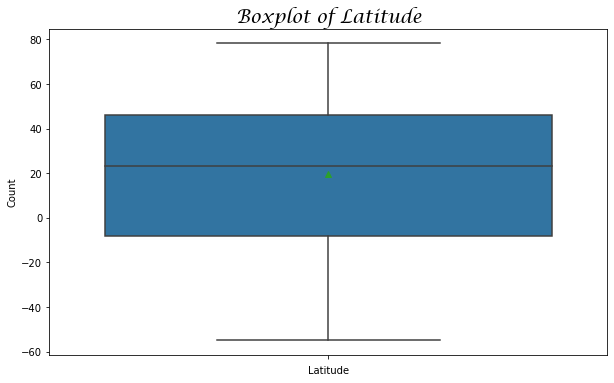

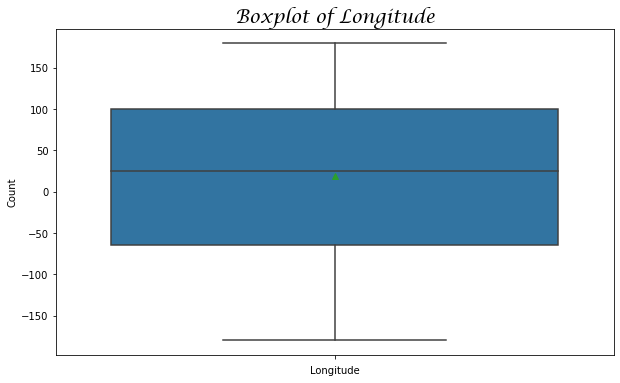

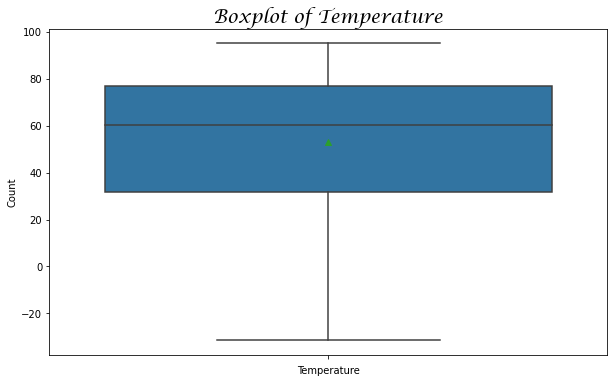

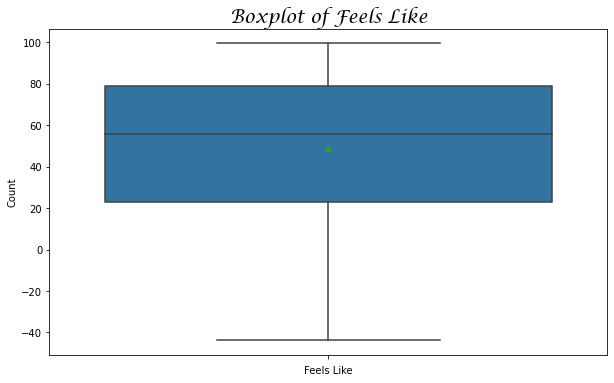

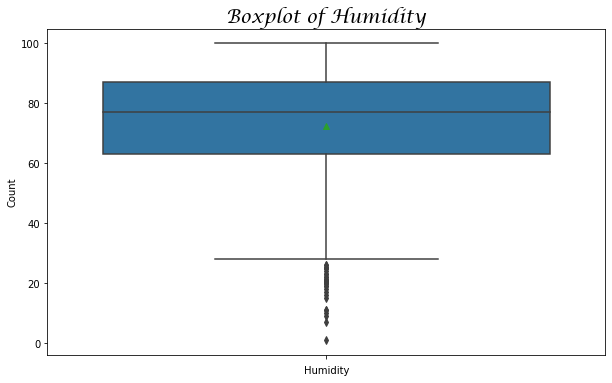

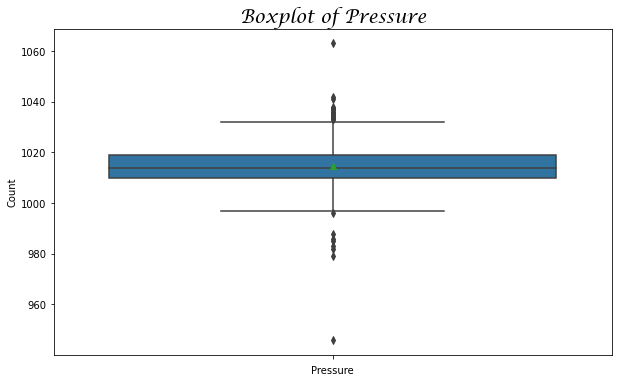

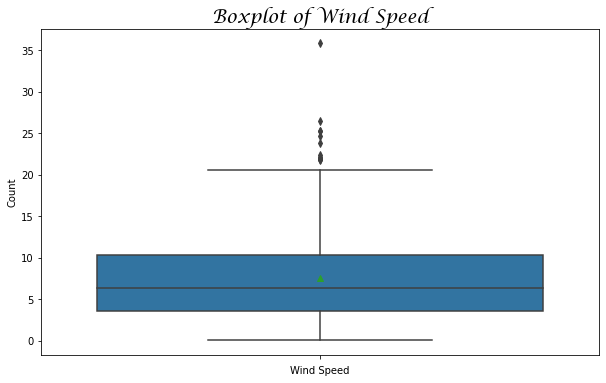

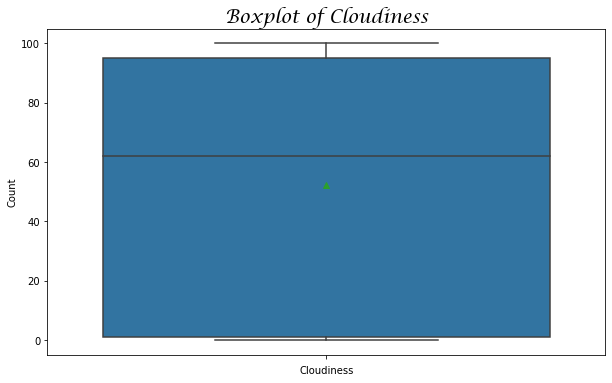

In [11]:
for col in df.columns:
        if(df[col].dtype == np.float64 or df[col].dtype == np.int64):
            
            plt.figure(figsize=(10,6))
            
            sns.boxplot(y=col, data=df, showmeans="True")
            plt.title(f"Boxplot of {col}", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
            plt.xlabel(col)
            plt.ylabel("Count")
            
            plt.show()

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

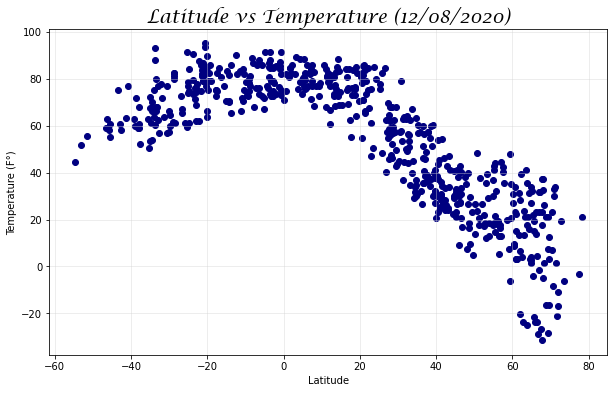

In [21]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Temperature, color = "navy")
plt.title("Latitude vs Temperature (12/08/2020)", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F°)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.show()

## Latitude vs. Humidity Plot

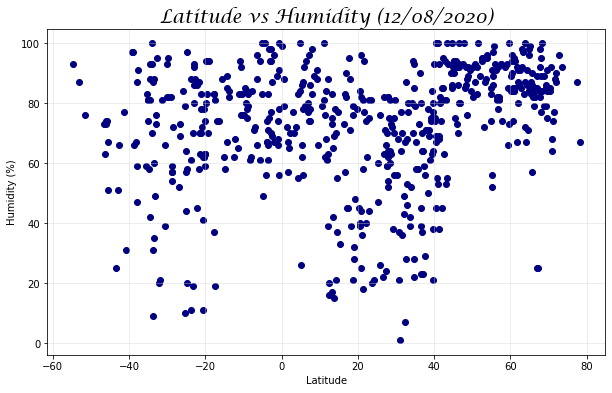

In [22]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Humidity, color = "navy")
plt.title("Latitude vs Humidity (12/08/2020)", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.show()

## Latitude vs. Cloudiness Plot

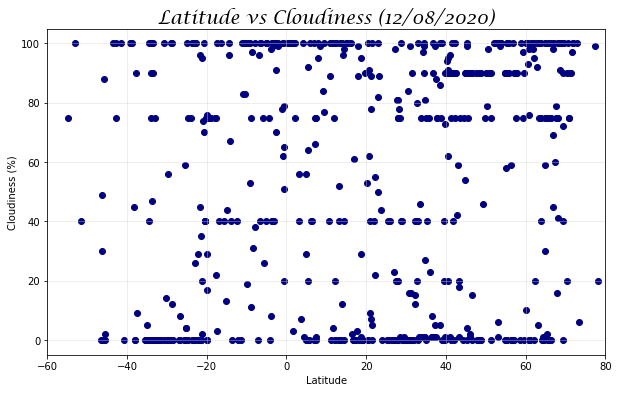

In [23]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df.Cloudiness, color = "navy")
plt.title("Latitude vs Cloudiness (12/08/2020)", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)

plt.show()

## Latitude vs. Wind Speed Plot

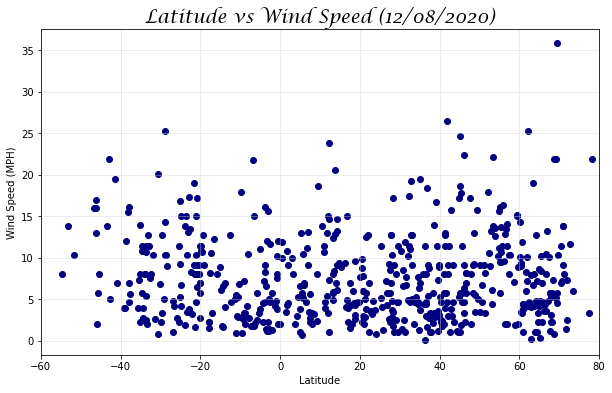

In [24]:
plt.figure(figsize=(10,6))

plt.scatter(df.Latitude, df["Wind Speed"], color = "navy")
plt.title("Latitude vs Wind Speed (12/08/2020)", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid(color="lightgrey", alpha = 0.5)

plt.xlim(-60, 80)

plt.show()

## Linear Regression

In [20]:
corrs = df.corr()
corrs

,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness
Latitude,1.000000,-0.126985,-0.770062,-0.770914,0.213848,0.091689,-0.023307,0.129894
Longitude,-0.126985,1.000000,0.045972,0.037481,-0.154397,-0.036670,0.140160,0.078172
Temperature,-0.770062,0.045972,1.000000,0.989952,-0.379371,-0.057877,0.041914,-0.091262
Feels Like,-0.770914,0.037481,0.989952,1.000000,-0.296875,-0.075186,-0.057381,-0.072040
Humidity,0.213848,-0.154397,-0.379371,-0.296875,1.000000,-0.053575,-0.095155,0.270925
Pressure,0.091689,-0.036670,-0.057877,-0.075186,-0.053575,1.000000,-0.038409,-0.249444
Wind Speed,-0.023307,0.140160,0.041914,-0.057381,-0.095155,-0.038409,1.000000,0.072658
Cloudiness,0.129894,0.078172,-0.091262,-0.072040,0.270925,-0.249444,0.072658,1.000000


In [35]:
df["Hemisphere_NS"] = ["Northern" if x > 0 else "Southern" for x in df.Latitude]
df["Hemisphere_WE"] = ["Eastern" if x > 0 else "Western" for x in df.Longitude]

df.head()

,City,Latitude,Longitude,Temperature,Feels Like,Humidity,Pressure,Wind Speed,Cloudiness,Hemisphere_NS,Hemisphere_WE
0,Vaini,-21.20,-175.20,78.80,82.33,83,1015,10.29,20,Southern,Western
1,Lakes Entrance,-37.88,147.98,67.96,63.32,47,1015,7.00,0,Southern,Eastern
2,Bethel,41.37,-73.41,28.18,15.91,68,1006,12.75,90,Northern,Western
3,Kapaa,22.08,-159.32,75.29,74.03,74,1018,12.75,40,Northern,Western
4,Ushuaia,-54.80,-68.30,44.60,38.39,93,1006,8.05,75,Southern,Western


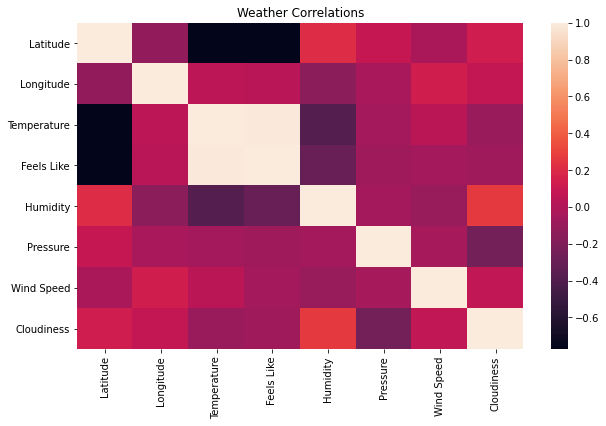

In [36]:
plt.figure(figsize=(10,6))

sns.heatmap(corrs)

plt.title("Weather Correlations")
plt.show()

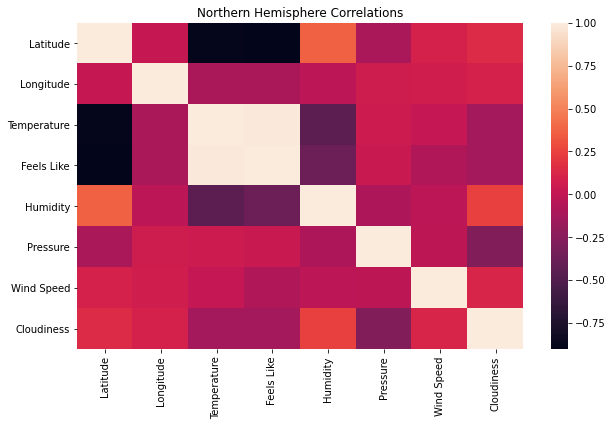

In [37]:
corrs2 = df.loc[df.Hemisphere_NS == "Northern"].corr()

plt.figure(figsize=(10,6))

sns.heatmap(corrs2)

plt.title("Northern Hemisphere Correlations")
plt.show()

In [38]:
target = df.Temperature
feature = df.Latitude

In [39]:
X = sm.add_constant(feature)
Y = target
model = sm.OLS(Y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Temperature   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     837.8
Date:                Tue, 08 Dec 2020   Prob (F-statistic):          2.48e-114
Time:                        01:10:26   Log-Likelihood:                -2481.1
No. Observations:                 577   AIC:                             4966.
Df Residuals:                     575   BIC:                             4975.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.6159      0.863     76.055      0.000      63.921      67.310
Latitude      -0.6433      0.022    -28.944      0.000      -0.687      -0.600
==============================================================================
Omnibus:                       24.901   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.406
Skew:                          -0.534   Prob(JB):                     1.12e-06
Kurtosis:                       2.968   Cond. No.                         45.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
slope = results.params[1]
intercept = results.params[0]

regress_values = feature * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = -0.64x + 65.62'

In [41]:
def doRegressionWork(hemisphere, df, inp_target):
    #filter
    if hemisphere in ["Northern", "Southern"]:
        df_sub = df.loc[df.Hemisphere_NS == hemisphere]
    else:
        df_sub = df.loc[df.Hemisphere_WE == hemisphere]
        
    # get target
    target = df_sub[inp_target]
    feature = df_sub.Latitude
    
    X = sm.add_constant(feature)
    Y = target
    model = sm.OLS(Y,X)
    results = model.fit()
    print(results.summary())
    
    # get equation
    slope = results.params[1]
    intercept = results.params[0]

    regress_values = feature * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)
    
    # plot
    plt.figure(figsize=(10,6))

    plt.scatter(df_sub.Latitude, df_sub[inp_target], color = "navy")
    plt.title(f"Latitude vs {inp_target}(12/8/2020)", fontsize=18, fontweight="bold", fontname = "Lucida Calligraphy")
    plt.xlabel("Latitude")
    plt.ylabel(inp_target)
    plt.grid(color="lightgrey", alpha = 0.5)
    
    plt.plot(feature, regress_values, color="skyblue")
#     plt.annotate(line_eq,(-40, 0),fontsize=15,color="red")

    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     1406.
Date:                Tue, 08 Dec 2020   Prob (F-statistic):          1.39e-131
Time:                        01:10:30   Log-Likelihood:                -1569.0
No. Observations:                 393   AIC:                             3142.
Df Residuals:                     391   BIC:                             3150.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.9515      1.439     63.218      0.0

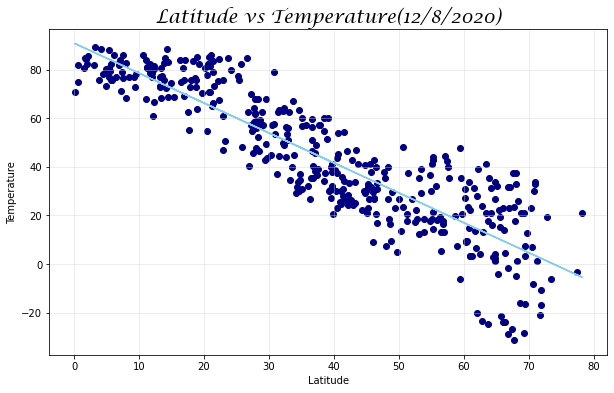

In [42]:
doRegressionWork("Northern", df, "Temperature")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.368
Method:                 Least Squares   F-statistic:                     107.5
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           4.38e-20
Time:                        01:10:51   Log-Likelihood:                -648.80
No. Observations:                 184   AIC:                             1302.
Df Residuals:                     182   BIC:                             1308.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.2289      1.153     73.061      0.0

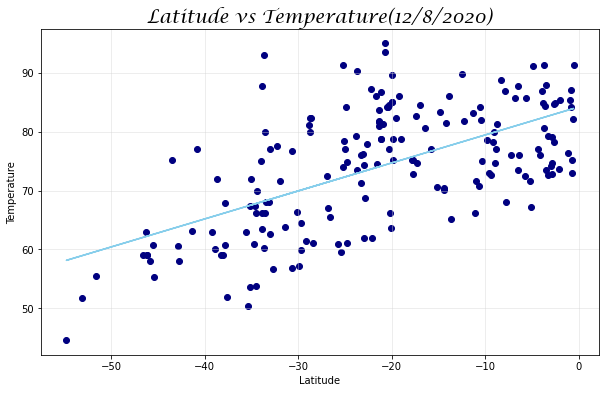

In [43]:
doRegressionWork("Southern", df, "Temperature")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

                            OLS Regression Results                            
Dep. Variable:               Humidity   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     58.75
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           1.43e-13
Time:                        01:13:50   Log-Likelihood:                -1728.1
No. Observations:                 393   AIC:                             3460.
Df Residuals:                     391   BIC:                             3468.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.3330      2.157     27.042      0.0

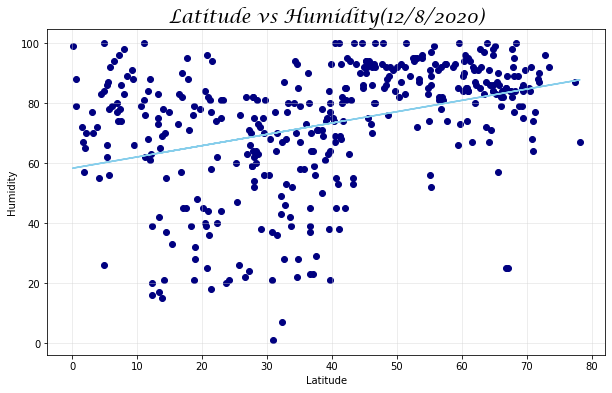

In [44]:
doRegressionWork("Northern", df, "Humidity")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

                            OLS Regression Results                            
Dep. Variable:               Humidity   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     6.886
Date:                Tue, 08 Dec 2020   Prob (F-statistic):            0.00942
Time:                        01:13:52   Log-Likelihood:                -806.61
No. Observations:                 184   AIC:                             1617.
Df Residuals:                     182   BIC:                             1624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.9669      2.718     28.316      0.0

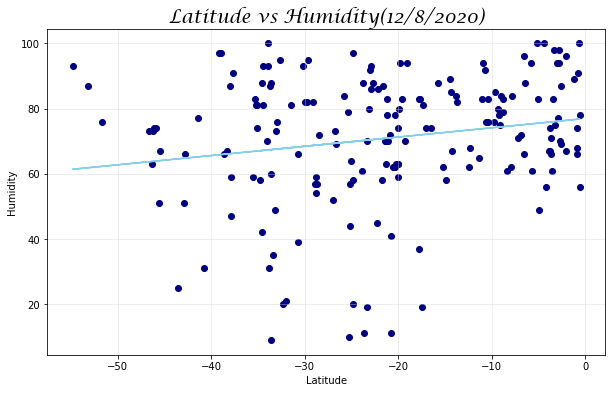

In [45]:
doRegressionWork("Southern", df, "Humidity")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

                            OLS Regression Results                            
Dep. Variable:             Cloudiness   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     9.229
Date:                Tue, 08 Dec 2020   Prob (F-statistic):            0.00254
Time:                        01:13:52   Log-Likelihood:                -2017.4
No. Observations:                 393   AIC:                             4039.
Df Residuals:                     391   BIC:                             4047.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.1255      4.503      9.132      0.0

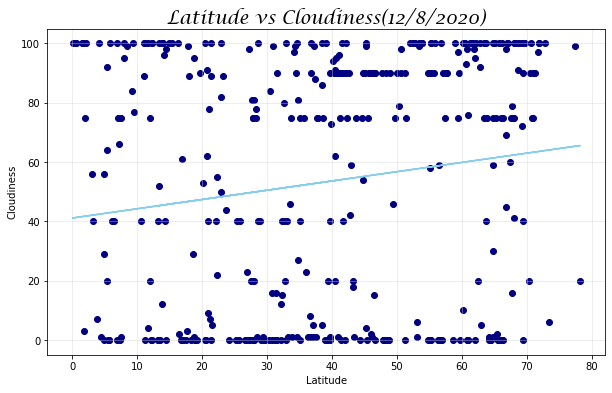

In [46]:
doRegressionWork("Northern", df, "Cloudiness")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

                            OLS Regression Results                            
Dep. Variable:             Cloudiness   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     17.80
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           3.86e-05
Time:                        01:13:53   Log-Likelihood:                -936.17
No. Observations:                 184   AIC:                             1876.
Df Residuals:                     182   BIC:                             1883.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.7809      5.496     12.697      0.0

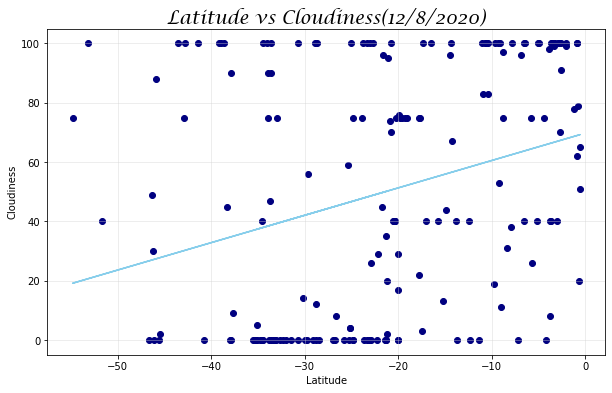

In [47]:
doRegressionWork("Southern", df, "Cloudiness")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

                            OLS Regression Results                            
Dep. Variable:             Wind Speed   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.724
Date:                Tue, 08 Dec 2020   Prob (F-statistic):             0.0544
Time:                        01:13:54   Log-Likelihood:                -1202.7
No. Observations:                 393   AIC:                             2409.
Df Residuals:                     391   BIC:                             2417.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4263      0.567     11.342      0.0

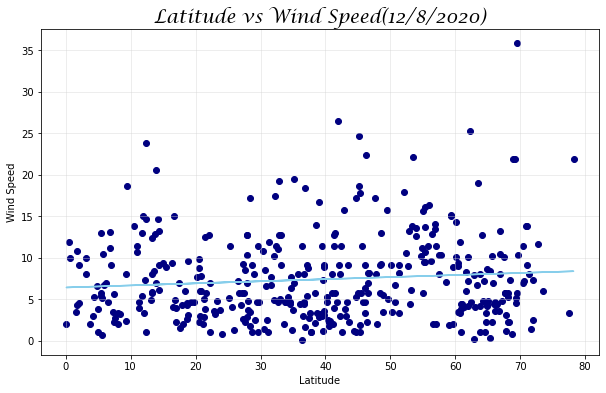

In [48]:
doRegressionWork("Northern", df, "Wind Speed")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

                            OLS Regression Results                            
Dep. Variable:             Wind Speed   R-squared:                       0.078
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     15.30
Date:                Tue, 08 Dec 2020   Prob (F-statistic):           0.000130
Time:                        01:14:09   Log-Likelihood:                -550.95
No. Observations:                 184   AIC:                             1106.
Df Residuals:                     182   BIC:                             1112.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5311      0.677      8.165      0.0

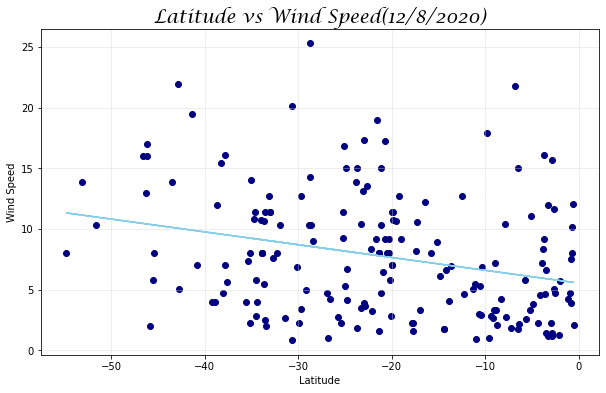

In [49]:
doRegressionWork("Southern", df, "Wind Speed")